# Recap

- We tested the single agent setting for a different task.
- The landmarks were always fixed at time of the environment initialization.
- It was shown that the agent learned to navigate to any part of the map.
- Particularly, when the agent's starting coordinate was kept fixed and overflow would happen. Random restart is an essencial part of exploration.
- The optimal policies are not deterministic -- the temperature parameter $\tau$ that regulates the entropy was tested for **1**, **2**, **3**, **5** and **10**.

## Findings

1. The most useful task is to randomly restart the landmarks.
2. Regularization, via parameter clipping, improved learning.
3. The optimal value for $\tau = 5.0$.


# Duo Task

## Goal:

### Agents must learn how to navigate to a target landmark, while avoiding other agents.

- Both agents and landmarks are restarted at the begining of each episode. And agents are assigned a landmark they must navigate to, they must through trial and error be find which landmark they were assigned to.
- States are the coordinates to the other agent and to both landmarks.
- Reward is defined by the distance from an agent to its assigned landmark. If they collide both receive an extra reward=-1.



The objective of this notebook is to compare three learning settings.

1. Centralized Actor Critic

    - Single agent.
    - Fully observable setting.
    - Learnings using the average reward from both players.
2. Cooperative Actor Critic

    - Independent agents.
    - Fully observable setting.
    - Learnings using the average reward from both players.

3. Independent Learners Actor Critic

    - Independent agents.
    - Fully observable setting.
    - Individual rewards.

## Section A: First attempt.


## Settings


1. We compare the three models above. 
2. Initially, $\tau = 100$ and it falls linearly with the number of episodes (`explore_episodes=3000`). 
3. Each test dataframe consists of the DataFrame.describe() statistics from **N** = 30 independent random trials, each of which consisting of rollouts of `M=100`, with $\tau$ set to a predetermined value.

Parameters:
```
"""Configuration"""
# The hyperparameter for the environment: Number of agents.
N_AGENTS = 2
# The pipeline agent
AGENT_TYPE = 'ActorCriticCentral'
# Alpha learning rate for the critic
ALPHA = 0.5
# Learning rate for the actor
BETA = 0.3
# Final temperature parameter
TAU = 5.0
# The weighting for the moving average
ZETA = 0.01
# The episodes with temperature greater than TAU
EXPLORE_EPISODES = 3000
# The total number of training episodes.
EPISODES = 7500
# Applies temperature parameter from 100-TAU
EXPLORE = True  # WHETER OR NOT WE USE EXPLORATION
CONSENSUS_MATRIX_TYPE = 'metropolis'
# Maximum number of edges.
CONSENSUS_MAX_EDGES = 0
# Stop training at every checkpoint_interval
CHECKPOINT_INTERVAL = 500
# Evaluate checkpoint for checkpoint evaluations
CHECKPOINT_EVALUATIONS = 32
# Training_cycle = train for checkpoint interval + checkpoint_evaluation
TRAINING_CYCLES = EPISODES // CHECKPOINT_INTERVAL
# Seed for individual runs, e.g, `python central.py`
SEED = 1
# The path that the experiments will be saved at.
BASE_PATH = 'data/00_duo_w08v2'
# The number of pipeline workers
N_WORKERS = 15
# Those are the training random seeds, i.e., `.\pipeline`
PIPELINE_SEEDS = [
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76
]
```

## DuoTask

In [1]:
from pathlib import Path
import pandas as pd
BASE_PATH = '00_duo_w08v2/'

def get_path(x: str) -> str:
    return (Path(BASE_PATH) / x / '02'/ 'pipeline-rollouts-summary.csv').as_posix()

def get_csv(x: str) -> pd.DataFrame:
    return pd.read_csv(get_path(x), sep=',', index_col=0)
 
def describe(dataframe: pd.DataFrame, label: str) -> pd.DataFrame:
    """Describes the dataframe
    
    Parameters
    ----------
    dataframe: pd.DataFrame
        A dataframe with description N independent rollouts.
        Each consisting of M timesteps.
        Trials are in the columns and rows are statistics.
        The result of df.describe()
   
    Returns
    -------
    dataframe: pd.DataFrame
        A description of the average return.
    
    """
    df = dataframe.drop(['std', 'count', '25%', '50%', '75%'], axis=0)
    ts = df.T.describe()['mean']
    ts.name = label
    return ts.to_frame()

## LEADERBOARD DUO

* Early stopping
* No coefficient scaling.

In [2]:
central_df = get_csv('00_central')
distributed_v_df = get_csv('01_distributed_learners_v')
distributed_q_df = get_csv('02_distributed_learners_q')
independent_df = get_csv('02_independent_learners')
consensus_df = get_csv('03_consensus_learners')

dataframes = []
dataframes.append(describe(central_df, label='Central'))
dataframes.append(describe(distributed_v_df, label='Distributed V'))
dataframes.append(describe(distributed_q_df, label='Distributed Q'))
dataframes.append(describe(independent_df, label='Independent'))
dataframes.append(describe(consensus_df, label='Consensus 0'))
noregdf = pd.concat(dataframes, axis=1)
noregdf

,Central,Distributed V,Distributed Q,Independent,Consensus 0
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.830040,-1.004297,-0.858820,-0.892309,-0.953889
std,0.200758,0.294407,0.258458,0.270232,0.400461
min,-1.277805,-1.747653,-1.379718,-1.561585,-2.081548
25%,-0.971580,-1.222500,-1.022172,-1.066459,-1.073955
50%,-0.807798,-0.921407,-0.800058,-0.860482,-0.834541
75%,-0.669926,-0.796883,-0.699784,-0.722185,-0.661614
max,-0.498115,-0.494297,-0.327838,-0.446712,-0.520615


## Trio Task

* Early stopping
* No coefficient scaling.

In [3]:
from pathlib import Path
import pandas as pd
BASE_PATH = '01_trio_w08v2/'

def get_path(x: str) -> str:
    return (Path(BASE_PATH) / x / '02'/ 'pipeline-rollouts-summary.csv').as_posix()

def get_csv(x: str) -> pd.DataFrame:
    return pd.read_csv(get_path(x), sep=',', index_col=0)
 
def describe(dataframe: pd.DataFrame, label: str) -> pd.DataFrame:
    """Describes the dataframe
    
    Parameters
    ----------
    dataframe: pd.DataFrame
        A dataframe with description N independent rollouts.
        Each consisting of M timesteps.
        Trials are in the columns and rows are statistics.
        The result of df.describe()
   
    Returns
    -------
    dataframe: pd.DataFrame
        A description of the average return.
    
    """
    df = dataframe.drop(['std', 'count', '25%', '50%', '75%'], axis=0)
    ts = df.T.describe()['mean']
    ts.name = label
    return ts.to_frame()

## LEADERBOARD TRIO

* Early stopping
* No coefficient scaling.

In [4]:
central_df = get_csv('00_central')
distributed_v_df = get_csv('01_distributed_learners_v')
distributed_q_df = get_csv('02_distributed_learners_q')
independent_df = get_csv('02_independent_learners')
consensus_df = get_csv('03_consensus_learners')

dataframes = []
dataframes.append(describe(central_df, label='Central'))
dataframes.append(describe(distributed_v_df, label='Distributed V'))
dataframes.append(describe(distributed_q_df, label='Distributed Q'))
dataframes.append(describe(independent_df, label='Independent'))
dataframes.append(describe(consensus_df, label='Consensus 0'))
noregdf = pd.concat(dataframes, axis=1)
noregdf

,Central,Distributed V,Distributed Q,Independent,Consensus 0
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.983400,-1.239187,-1.404430,-0.902668,-1.043262
std,0.216777,0.284464,0.433704,0.239304,0.300263
min,-1.401608,-1.788341,-2.305033,-1.662001,-1.715591
25%,-1.128635,-1.487501,-1.651229,-0.977483,-1.208001
50%,-0.991817,-1.182313,-1.447136,-0.880747,-1.067586
75%,-0.801666,-0.994964,-1.014393,-0.736905,-0.789998
max,-0.586792,-0.822073,-0.759026,-0.479741,-0.546378


## Quad Task

* Early stopping
* No coefficient scaling.

In [18]:
from pathlib import Path
import pandas as pd
BASE_PATH = '04_quad/'

def get_path(x: str) -> str:
    return (Path(BASE_PATH) / x / '02'/ 'pipeline-rollouts-summary.csv').as_posix()

def get_csv(x: str) -> pd.DataFrame:
    return pd.read_csv(get_path(x), sep=',', index_col=0)
 
def describe(dataframe: pd.DataFrame, label: str) -> pd.DataFrame:
    """Describes the dataframe
    
    Parameters
    ----------
    dataframe: pd.DataFrame
        A dataframe with description N independent rollouts.
        Each consisting of M timesteps.
        Trials are in the columns and rows are statistics.
        The result of df.describe()
   
    Returns
    -------
    dataframe: pd.DataFrame
        A description of the average return.
    
    """
    df = dataframe.drop(['std', 'count', '25%', '50%', '75%'], axis=0)
    ts = df.T.describe()['mean']
    ts.name = label
    return ts.to_frame()

## QUAD Leaderboard

* Early stopping
* No coefficient scaling.

In [20]:
central_df = get_csv('00_central')
distributed_v_df = get_csv('01_distributed_learners_v')
distributed_q_df = get_csv('02_distributed_learners_q')
independent_df = get_csv('03_independent_learners')
consensus_df = get_csv('04_consensus_learners')

dataframes = []
dataframes.append(describe(central_df, label='Central'))
dataframes.append(describe(distributed_v_df, label='Distributed V'))
dataframes.append(describe(distributed_q_df, label='Distributed Q'))
dataframes.append(describe(independent_df, label='Independent'))
dataframes.append(describe(consensus_df, label='Consensus 0'))
noregdf = pd.concat(dataframes, axis=1)
noregdf

,Central,Distributed V,Distributed Q,Independent,Consensus 0
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.999785,-1.202841,-1.346527,-0.898729,-1.113835
std,0.105818,0.293588,0.222723,0.141983,0.334524
min,-1.121593,-1.691129,-1.663331,-1.138658,-1.832741
25%,-1.075238,-1.404511,-1.488415,-0.987145,-1.272360
50%,-1.035690,-1.265410,-1.359544,-0.846095,-1.087233
75%,-0.940431,-0.999014,-1.194768,-0.826522,-0.911867
max,-0.785622,-0.788020,-0.927434,-0.677085,-0.689357


# SECTION B

* Early stopping
* Reward rescaling $f_i$

$$ f_i \sim Uniform(0, 2) \forall i \in \mathcal{N} $$

## B.1 Duo Task


In [29]:
from pathlib import Path
import pandas as pd
BASE_PATH = '07_duo_randomized_coefficents/'

def get_path(x: str) -> str:
    return (Path(BASE_PATH) / x / '02'/ 'pipeline-rollouts-summary.csv').as_posix()

def get_csv(x: str) -> pd.DataFrame:
    return pd.read_csv(get_path(x), sep=',', index_col=0)
 
def describe(dataframe: pd.DataFrame, label: str) -> pd.DataFrame:
    """Describes the dataframe
    
    Parameters
    ----------
    dataframe: pd.DataFrame
        A dataframe with description N independent rollouts.
        Each consisting of M timesteps.
        Trials are in the columns and rows are statistics.
        The result of df.describe()
   
    Returns
    -------
    dataframe: pd.DataFrame
        A description of the average return.
    
    """
    df = dataframe.drop(['std', 'count', '25%', '50%', '75%'], axis=0)
    ts = df.T.describe()['mean']
    ts.name = label
    return ts.to_frame()


## LEADERBOARD DUO

* Early stopping
* Reward rescaling $f_i$

$$ f_i \sim Uniform(0, 2) \forall i \in \mathcal{N} $$

In [27]:
central_df = get_csv('00_central')
distributed_v_df = get_csv('01_distributed_learners_v')
distributed_q_df = get_csv('02_distributed_learners_q')
independent_df = get_csv('03_independent_learners')
consensus_df = get_csv('04_consensus_learners')

dataframes = []
dataframes.append(describe(central_df, label='Central'))
dataframes.append(describe(distributed_v_df, label='Distributed V'))
dataframes.append(describe(distributed_q_df, label='Distributed Q'))
dataframes.append(describe(independent_df, label='Independent'))
dataframes.append(describe(consensus_df, label='Consensus 0'))
noregdf = pd.concat(dataframes, axis=1)
noregdf

,Central,Distributed V,Distributed Q,Independent,Consensus 0
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-1.403916,-1.429249,-0.903701,-1.470705,-0.969636
std,0.565535,0.698775,0.508968,0.684714,0.431333
min,-2.605342,-3.436503,-2.389786,-3.436503,-2.144912
25%,-1.809053,-1.839780,-1.055850,-1.894029,-1.200654
50%,-1.399229,-1.456981,-0.761560,-1.500466,-0.910706
75%,-0.929730,-0.890952,-0.605911,-0.964114,-0.654680
max,-0.470724,-0.270314,-0.326420,-0.254735,-0.316584


## B.2 Task Trio

In [37]:
from pathlib import Path
import pandas as pd
BASE_PATH = '05_trio_randomized_coefficents/'

def get_path(x: str) -> str:
    return (Path(BASE_PATH) / x / '02'/ 'pipeline-rollouts-summary.csv').as_posix()

def get_csv(x: str) -> pd.DataFrame:
    return pd.read_csv(get_path(x), sep=',', index_col=0)
 
def describe(dataframe: pd.DataFrame, label: str) -> pd.DataFrame:
    """Describes the dataframe
    
    Parameters
    ----------
    dataframe: pd.DataFrame
        A dataframe with description N independent rollouts.
        Each consisting of M timesteps.
        Trials are in the columns and rows are statistics.
        The result of df.describe()
   
    Returns
    -------
    dataframe: pd.DataFrame
        A description of the average return.
    
    """
    df = dataframe.drop(['std', 'count', '25%', '50%', '75%'], axis=0)
    ts = df.T.describe()['mean']
    ts.name = label
    return ts.to_frame()


## B.2 LEADERBOARD TRIO

* Early stopping
* Reward rescaling $f_i$

$$ f_i \sim Uniform(0, 2) \forall i \in \mathcal{N} $$

In [38]:
central_df = get_csv('00_central')
distributed_v_df = get_csv('01_distributed_learners_v')
distributed_q_df = get_csv('02_distributed_learners_q')
independent_df = get_csv('03_independent_learners')
consensus_df = get_csv('04_consensus_learners')

dataframes = []
dataframes.append(describe(central_df, label='Central'))
dataframes.append(describe(distributed_v_df, label='Distributed V'))
dataframes.append(describe(distributed_q_df, label='Distributed Q'))
dataframes.append(describe(independent_df, label='Independent'))
dataframes.append(describe(consensus_df, label='Consensus 0'))
noregdf = pd.concat(dataframes, axis=1)
noregdf

,Central,Distributed V,Distributed Q,Independent,Consensus 0
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-1.288160,-1.504116,-1.365961,-1.508202,-1.021835
std,0.622926,0.643330,0.609930,0.637757,0.438259
min,-2.680361,-2.994706,-2.634458,-2.825317,-1.854005
25%,-1.648791,-1.771450,-1.698431,-1.773059,-1.270762
50%,-1.141395,-1.453467,-1.280058,-1.475281,-0.968021
75%,-0.782975,-1.047223,-0.956650,-1.071623,-0.762515
max,-0.255115,-0.312756,-0.342898,-0.266580,-0.155101


## B.3 Task Quad

In [41]:
from pathlib import Path
import pandas as pd
BASE_PATH = '08_quad_randomized_coefficents'

def get_path(x: str) -> str:
    return (Path(BASE_PATH) / x / '02'/ 'pipeline-rollouts-summary.csv').as_posix()

def get_csv(x: str) -> pd.DataFrame:
    return pd.read_csv(get_path(x), sep=',', index_col=0)
 
def describe(dataframe: pd.DataFrame, label: str) -> pd.DataFrame:
    """Describes the dataframe
    
    Parameters
    ----------
    dataframe: pd.DataFrame
        A dataframe with description N independent rollouts.
        Each consisting of M timesteps.
        Trials are in the columns and rows are statistics.
        The result of df.describe()
   
    Returns
    -------
    dataframe: pd.DataFrame
        A description of the average return.
    
    """
    df = dataframe.drop(['std', 'count', '25%', '50%', '75%'], axis=0)
    ts = df.T.describe()['mean']
    ts.name = label
    return ts.to_frame()


## LEADERBOARD QUAD

* Early stopping
* Reward rescaling $f_i$

$$ f_i \sim Uniform(0, 2) \forall i \in \mathcal{N} $$

In [36]:
central_df = get_csv('00_central')
distributed_v_df = get_csv('01_distributed_learners_v')
distributed_q_df = get_csv('02_distributed_learners_q')
independent_df = get_csv('03_independent_learners')
consensus_df = get_csv('04_consensus_learners')

dataframes = []
dataframes.append(describe(central_df, label='Central'))
dataframes.append(describe(distributed_v_df, label='Distributed V'))
dataframes.append(describe(distributed_q_df, label='Distributed Q'))
dataframes.append(describe(independent_df, label='Independent'))
dataframes.append(describe(consensus_df, label='Consensus 0'))
noregdf = pd.concat(dataframes, axis=1)
noregdf

,Central,Distributed V,Distributed Q,Independent,Consensus 0
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.982042,-1.412348,-1.467131,-1.425404,-0.968090
std,0.290584,0.489271,0.538444,0.531782,0.267456
min,-1.423834,-2.024315,-2.095151,-2.037541,-1.448825
25%,-1.112613,-1.752482,-1.939095,-1.833037,-1.121231
50%,-1.014786,-1.453449,-1.572320,-1.560807,-0.989618
75%,-0.969550,-1.174566,-1.171600,-0.993946,-0.764772
max,-0.474436,-0.624698,-0.604232,-0.624803,-0.571708


# SECTION C

* Simulations from section B.3

## C.1) Central Agent

BASE_PATH = '08_quad_randomized_coefficents/00_central/02'

### C.1.1 Rollout Simulation

GIF from the best performing training.

![pipeline-central-simulation](08_quad_randomized_coefficents/00_central/02/simulation-pipeline-best.gif)

### C.1.2 Rollout Graph


![pipeline-central-simulation](08_quad_randomized_coefficents/00_central/02/evaluation_rollout_n4_num01.png)

In [43]:
df = pd.read_csv('08_quad_randomized_coefficents/00_central/02/evaluation_rollout-num01.csv', sep=',')
df.sum()

Unnamed: 0    4950.000000
1              -47.443596
dtype: float64

### C.1.3 Train<a name="A-1.3"></a> 



![pipeline-central-train-30](08_quad_randomized_coefficents/00_central/02/train_pipeline_m10.png)
![rollout-central-train-30](08_quad_randomized_coefficents/00_central/02/train_rollout_m10.png)

### C.1.4 Collision 

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

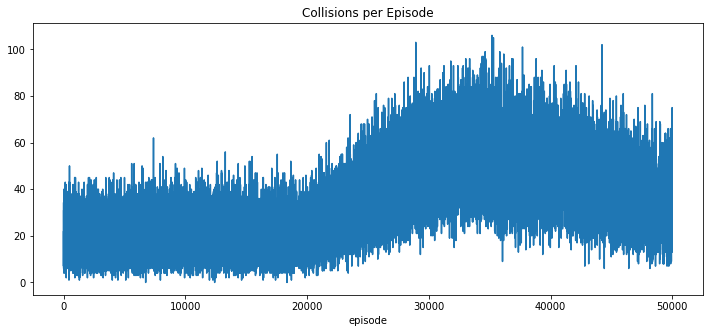

In [44]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '08_quad_randomized_coefficents/00_central/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

### C.1.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

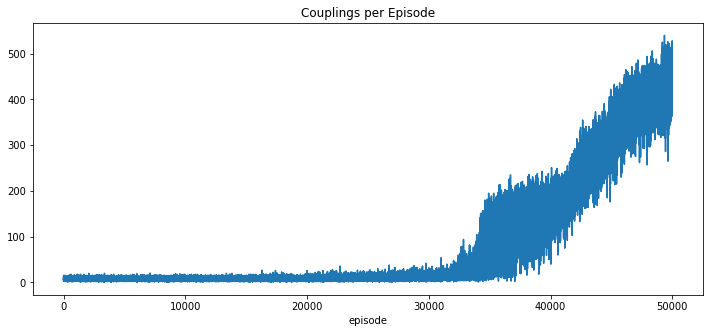

In [45]:
BASE_PATH = '08_quad_randomized_coefficents/00_central/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## 2) Distributed Actor Critic V


BASE_PATH = '08_quad_randomized_coefficents/01_distributed_learners_v/02'

### C.2.1 Rollout Simulation

GIF from the best performing training.

![pipeline-distributed-simulation](08_quad_randomized_coefficents/01_distributed_learners_v/02/simulation-pipeline-best.gif)

### C.2.2 Rollout Graph


![pipeline-distributed-rollout](08_quad_randomized_coefficents/01_distributed_learners_v/02/evaluation_rollout_n4_num08.png)

In [46]:
df = pd.read_csv('08_quad_randomized_coefficents/01_distributed_learners_v/02/evaluation_rollout-num08.csv', sep=',')
df.sum()

Unnamed: 0    4950.000000
1              -62.469815
dtype: float64

### C.2.3 Train<a name="A-2.3"></a> 



![pipeline-distributed-train-30](08_quad_randomized_coefficents/01_distributed_learners_v/02/train_pipeline_m10.png)
![rollout-distributed-train-30](08_quad_randomized_coefficents/01_distributed_learners_v/02/train_rollout_m10.png)

### C.2.4 Collision 

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

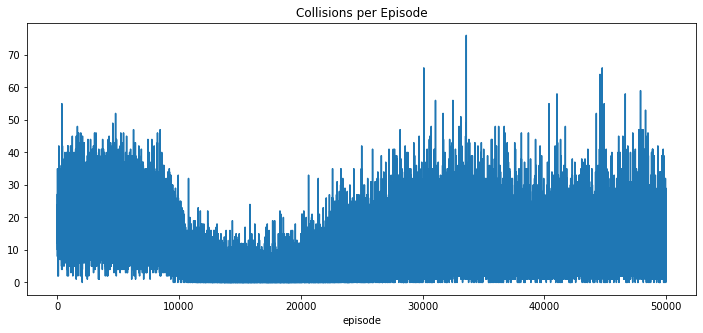

In [49]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '08_quad_randomized_coefficents/01_distributed_learners_v/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

### C.2.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

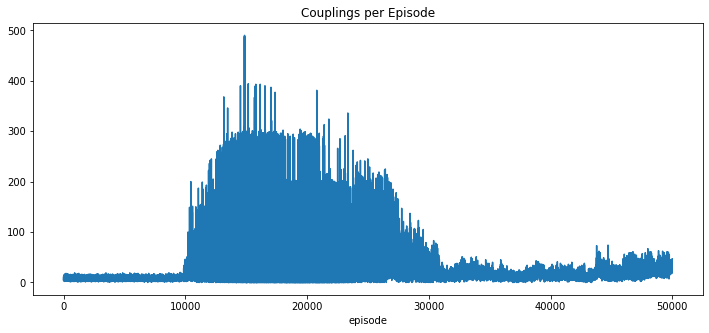

In [50]:
BASE_PATH = '08_quad_randomized_coefficents/01_distributed_learners_v/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## 3) Distributed Actor Critic Q


BASE_PATH = '08_quad_randomized_coefficents/02_distributed_learners_q/02'

### C.3.1 Rollout Simulation

GIF from the best performing training.

![pipeline-distributed-simulation](08_quad_randomized_coefficents/02_distributed_learners_q/02/simulation-pipeline-best.gif)

### C.3.2 Rollout Graph


![pipeline-distributed-rollout](08_quad_randomized_coefficents/02_distributed_learners_q/02/evaluation_rollout_n4_num08.png)

In [51]:
df = pd.read_csv('08_quad_randomized_coefficents/02_distributed_learners_q/02/evaluation_rollout-num08.csv', sep=',')
df.sum()

Unnamed: 0    4950.000000
1              -60.423168
dtype: float64

### C.3.3 Train<a name="A-2.3"></a> 



![pipeline-distributed-train-30](08_quad_randomized_coefficents/02_distributed_learners_q/02/train_pipeline_m10.png)
![rollout-distributed-train-30](08_quad_randomized_coefficents/02_distributed_learners_q/02/train_rollout_m10.png)

### C.2.4 Collision 

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

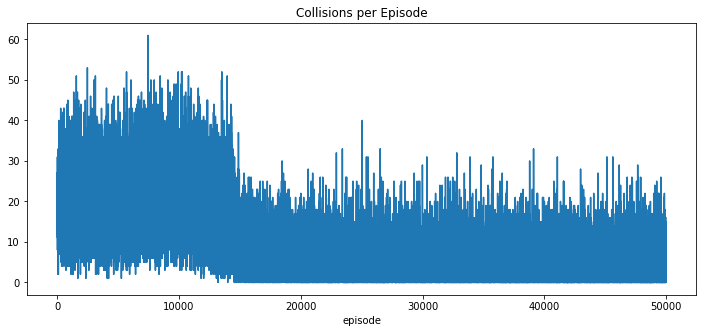

In [53]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '08_quad_randomized_coefficents/02_distributed_learners_q/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

### C.2.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

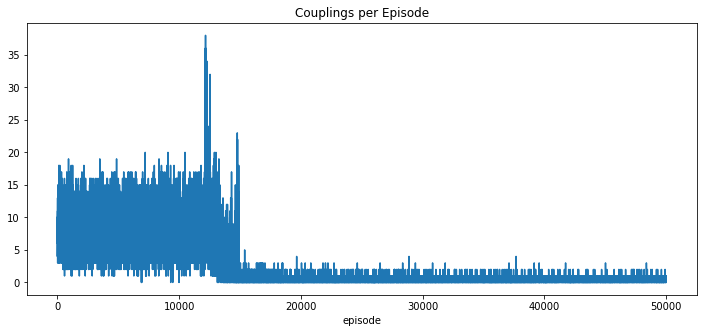

In [54]:
BASE_PATH = '08_quad_randomized_coefficents/02_distributed_learners_q/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## 5) Consensus Learners Actor Critic


BASE_PATH = '08_quad_randomized_coefficents/04_consensus_learners/02'

### C.5.1 Rollout Simulation

GIF from the best performing training.

![pipeline-distributed-simulation](08_quad_randomized_coefficents/04_consensus_learners/02/simulation-pipeline-best.gif)

### C.4.2 Rollout Graph


![pipeline-distributed-rollout](08_quad_randomized_coefficents/03_independent_learners/02/evaluation_rollout_n4_num01.png)

In [58]:
df = pd.read_csv('08_quad_randomized_coefficents/04_consensus_learners/02/evaluation_rollout-num01.csv', sep=',')
df.sum()

Unnamed: 0    4950.000000
1              -57.170834
dtype: float64

### C.4.3 Train<a name="A-2.3"></a> 



![pipeline-independent-train-30](08_quad_randomized_coefficents/04_consensus_learners/02/train_pipeline_m10.png)
![rollout-independent-train-30](08_quad_randomized_coefficents/04_consensus_learners/02/train_rollout_m10.png)

### C.2.4 Collision 

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

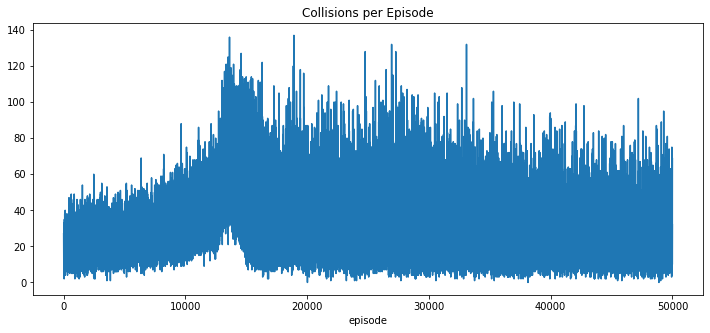

In [59]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '08_quad_randomized_coefficents/04_consensus_learners/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

### C.2.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

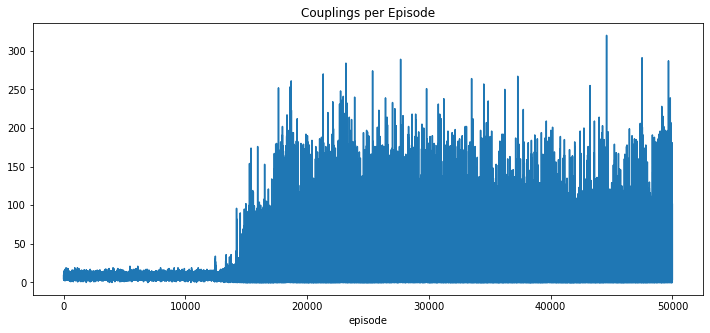

In [60]:
BASE_PATH = '08_quad_randomized_coefficents/04_consensus_learners/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)